## **Importing the libraries**

In [ ]:
#Importing the necessary libraries and modules for building models.
#Also using tensorflow and keras.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## **Importing the dataset**

In [ ]:
#Reading a CSV file named "laser eye surgery complications" using pandas.
#Assigning it to a variable called "df" 

df = pd.read_csv("/content/laser_eye_surgery_complications.csv")

## **Reading the dataset**

In [ ]:
#This command is used to display the first 10 rows of the DataFrame "df".

df.head(10)

,id,date,text,keywords
0,101036,16-06-1997,Chiron microkeratome suction popped off during...,Flap Issues; Astigmatism
1,101032,16-06-1997,Chiron keratome was used to perform a corneal ...,Flap Issues
2,98209,16-06-1997,"Laser treatment cut pt's eye. As a result, pt ...",NaN
3,101211,26-06-1997,Dr. Is using a non-approved laser machine.,NaN
4,102312,02-07-1997,Dr is using a non-approved laser.,NaN
5,102880,03-07-1997,A Dr is using an unapproved excimer laser.,NaN
6,105949,16-07-1997,Rptr had a total of 5 surgeries to repair visi...,NaN
7,106136,17-07-1997,Dr is using a non-approved laser machine.,NaN
8,106128,17-07-1997,Pt underwent phototherapeutic keratotomy. Afte...,NaN
9,134189,24-10-1997,Co is experiencing a number of pt eye injuries...,NaN


In [ ]:
#This command is used to retrieve the dimensions of the DataFrame "df".
#It shows the number of rows and columns in the DataFrame.

df.shape

(1368, 4)

## **Statistical Analysis**

In [ ]:
#This command is used to generate descriptive statistics of the DataFrame "df".

df.describe()

,id
count,1.368000e+03
mean,3.168478e+06
std,2.530656e+06
min,9.820900e+04
25%,1.044653e+06
50%,1.963885e+06
75%,5.167768e+06
max,9.119050e+06


## **Counting the number of incidents per keyword**

In [ ]:
#This code performs a series of operations on the "keywords" column of the DataFrame "df".

keyword_counts = df['keywords'].str.split('; ').explode().value_counts()

**Bar Chart**

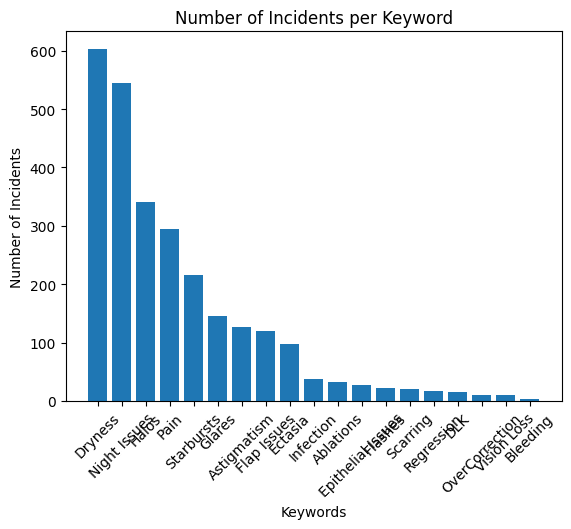

In [ ]:
#The below provided code is using matplotlib to create a bar plot based on the keyword_counts Series.
#Creating a bar plot using the x-values and the y-values.
#The label for the x-axis as "Keywords".
#The label for the y-axis as "Number of Incidents".
#The title of the plot as "Number of Incidents per Keyword".


plt.bar(keyword_counts.index, keyword_counts.values)
plt.xlabel('Keywords')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Keyword')
plt.xticks(rotation=45)
plt.show()

**Converting the date column to datetime format**

In [ ]:
#The code converts the values in the "date" column of the DataFrame "df"
#from a string format to a datetime format using the specified format string.

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

**Counting the number of incidents per date**

In [ ]:
#The code groups the DataFrame "df" by the "date" column
#and then calculates the size (count) of incidents for each unique date.

incident_counts = df.groupby('date').size()

**Line chart**

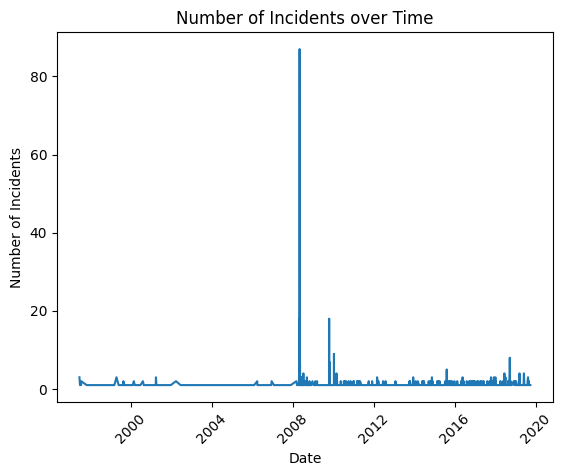

In [ ]:
#The below provided code uses matplotlib to create a line plot based on the "incident_counts" series.
#Creating a line plot using the dates as the x-values and the number of incidents as the y-values.
#The label for the x-axis as "Date".
#The label for the y-axis as "Number of Incidents".
#The title of the plot as "Number of Incidents over Time".
 

plt.plot(incident_counts.index, incident_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents over Time')
plt.xticks(rotation=45)
plt.show()

**Generating random values for the x-axis**

In [ ]:
#The below code creates a range of values that corresponds to the length of the DataFrame "df". 

x_values = range(len(df))

**Extracting the day of the month from the date column**

In [ ]:
#The below code creates a new column "day" in the DataFrame "df".
#It extracts the day component from the "date" column, which is converted to a datetime format.

df['day'] = pd.to_datetime(df['date']).dt.day

**Box plot**

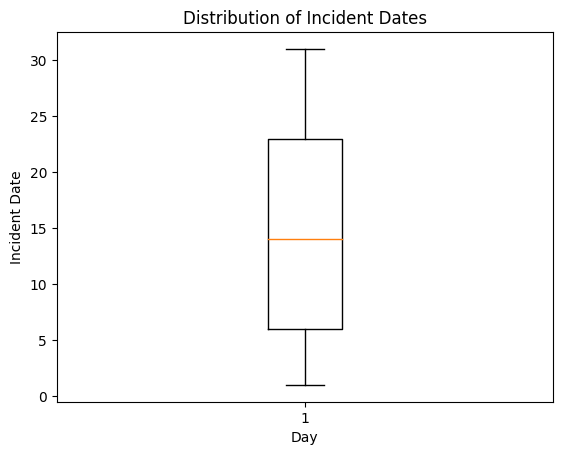

In [ ]:
#The below code provided matplotlib to create a boxplot based on the "day" column of the DataFrame "df".
#Creating a boxplot using the values in the "day" column of the DataFrame "df".
#The label for the x-axis as "Day".
#The label for the y-axis as "Incident Date".
#The title of the plot as "Distribution of Incident Dates".

plt.boxplot(df['day'])
plt.xlabel('Day')
plt.ylabel('Incident Date')
plt.title('Distribution of Incident Dates')
plt.show()

In [ ]:
#importing additional libraries for creating statistical visualizations and flattening the input.

import seaborn as sns
from keras.layers import Flatten

**Counting the number of incidents per keyword**

In [ ]:
#The below code splits the values in the "keywords" column based on the delimiter '; '.
#This creates a new column where each value is a list of keywords.

keyword_counts = df['keywords'].str.split('; ').explode().value_counts().reset_index()

**Renaming the columns**

In [ ]:
#The below code renames the columns of the DataFrame "keyword_counts" to "Keyword" and "Count" respectively.

keyword_counts.columns = ['Keyword', 'Count']

**Counting Plot**

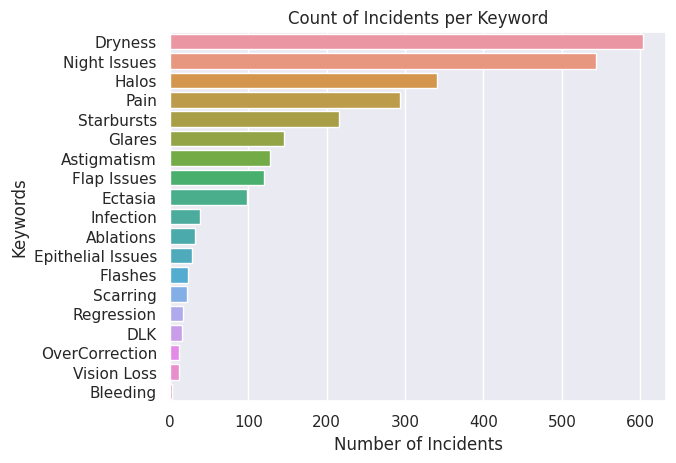

In [ ]:
#Sets the style of seaborn plots to "darkgrid".
#This adjusts the aesthetic style of the plot to have a dark background grid.
#Creating a bar plot using the x-values and the y-values from the "keyword_counts" DataFrame.
#The label for the x-axis as "Number of Incidents".
#The label for the y-axis as "Keywords".
#The title of the plot as "Count of Incidents per Keyword".

sns.set(style="darkgrid")
sns.barplot(x='Count', y='Keyword', data=keyword_counts)
plt.xlabel('Number of Incidents')
plt.ylabel('Keywords')
plt.title('Count of Incidents per Keyword')
plt.show()

**Filter instances with keywords**

In [ ]:
#The below code creates a new DataFrame called "df_filtered" by removing rows with missing values.
#The resulting DataFrame is then reset to have a new index starting from 0.

df_filtered = df.dropna(subset=['keywords']).reset_index(drop=True)

**Assigning labels based on the presence or absence of keywords**

In [ ]:
#The below code adds a new column called 'label' to the DataFrame. 

df_filtered['label'] = df_filtered['keywords'].apply(lambda x: 1 if x else 0)

**Spliting**

In [ ]:
#The below code splits the data into training and testing sets for text data and corresponding labels.

train_texts, test_texts, train_labels, test_labels = train_test_split(df_filtered['text'],
df_filtered['label'],test_size=0.2, random_state=42)

**Tokenizing the texts**

In [ ]:
#The tokenizer class from TensorFlow's Keras library to tokenize the text data and convert it into sequences.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

**Pad the sequences**

In [ ]:
#The below code calculates the maximum sequence length among all sequences in the training and testing data.
#Then performs padding on the sequences to make them of equal length. 

max_sequence_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# **CNN**
**Defining the CNN model**

In [ ]:
#Creating a sequential model, which is a linear stack of layers.
#Adding an Embedding layer to the model.
#Adding a 1D Convolutional layer to the model.
#Adding a MaxPooling layer to the model.
#Adding a Flatten layer to the model.
#Adding a fully connected Dense layer with 64 units and ReLU activation.
#Adding the output Dense layer with a single unit and sigmoid activation.
#Finally compiling the model.   

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the CNN model**

In [ ]:
#The below code trains the CNN model using the training data and corresponding labels.

cnn_model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

Epoch 1/10
57/57 [==============================] - 16s 249ms/step - loss: 0.0128 - accuracy: 0.9945 - val_loss: 1.3550e-23 - val_accuracy: 1.0000
Epoch 2/10
57/57 [==============================] - 14s 240ms/step - loss: 8.7348e-21 - accuracy: 1.0000 - val_loss: 1.0526e-23 - val_accuracy: 1.0000
Epoch 3/10
57/57 [==============================] - 14s 242ms/step - loss: 8.6802e-21 - accuracy: 1.0000 - val_loss: 1.0518e-23 - val_accuracy: 1.0000
Epoch 4/10
57/57 [==============================] - 16s 275ms/step - loss: 8.6801e-21 - accuracy: 1.0000 - val_loss: 1.0518e-23 - val_accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 21s 370ms/step - loss: 8.6801e-21 - accuracy: 1.0000 - val_loss: 1.0518e-23 - val_accuracy: 1.0000
Epoch 6/10
57/57 [==============================] - 15s 261ms/step - loss: 8.6801e-21 - accuracy: 1.0000 - val_loss: 1.0518e-23 - val_accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 14s 243ms/step - loss: 8.6801e-21 - accuracy: 

# **LSTM**
**Defining the LSTM model**

In [ ]:
#Creating a sequential model.
#Adding an Embedding layer to the model, similar to the CNN model.
#Adding an LSTM layer to the model.
#Adding a Dense layer to the model with a single unit and sigmoid activation.
#Finaly, compiling the model similar to the CNN model. 

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training the LSTM model**

In [ ]:
#The below code trains the LSTM model using the training data and corresponding labels. 

lstm_model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

Epoch 1/10
57/57 [==============================] - 100s 2s/step - loss: 0.1007 - accuracy: 0.9901 - val_loss: 5.1839e-05 - val_accuracy: 1.0000
Epoch 2/10
57/57 [==============================] - 89s 2s/step - loss: 4.1892e-05 - accuracy: 1.0000 - val_loss: 3.4842e-05 - val_accuracy: 1.0000
Epoch 3/10
57/57 [==============================] - 87s 2s/step - loss: 3.0343e-05 - accuracy: 1.0000 - val_loss: 2.6281e-05 - val_accuracy: 1.0000
Epoch 4/10
57/57 [==============================] - 88s 2s/step - loss: 2.3365e-05 - accuracy: 1.0000 - val_loss: 2.0684e-05 - val_accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 87s 2s/step - loss: 1.8691e-05 - accuracy: 1.0000 - val_loss: 1.6829e-05 - val_accuracy: 1.0000
Epoch 6/10
57/57 [==============================] - 87s 2s/step - loss: 1.5403e-05 - accuracy: 1.0000 - val_loss: 1.4051e-05 - val_accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 88s 2s/step - loss: 1.2989e-05 - accuracy: 1.0000 - val_loss: 1

**Evaluating the models on the test set**

In [ ]:
#The below code evaluates the performance of the CNN model and LSTM model on the test data.

cnn_loss, cnn_accuracy = cnn_model.evaluate(test_data, test_labels)
lstm_loss, lstm_accuracy = lstm_model.evaluate(test_data, test_labels)

8/8 [==============================] - 5s 678ms/step - loss: 8.0621e-06 - accuracy: 1.0000


**Creating a comparison plot**

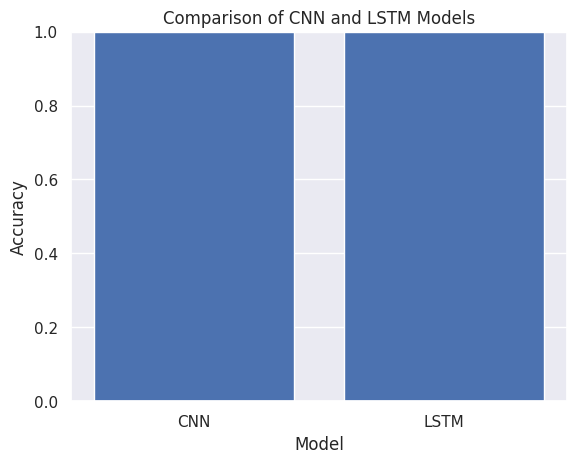

In [ ]:
#The below code provided plots a bar chart to compare the accuracy of the CNN and LSTM models.
#Creating a bar chart using the bar function from "matplotlib.pyplot".
#Sets the x-axis label to "Model".
#Sets the y-axis label to "Accuracy".
#The title of the plot to "Comparison of CNN and LSTM Models".
#Seting the limits of the y-axis to be between 0 and 1 to ensure the accuracy values within the plot. 

plt.bar(['CNN', 'LSTM'], [cnn_accuracy, lstm_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN and LSTM Models')
plt.ylim([0, 1])
plt.show()